## Our company has designed a new landing page for our website. We want to make sure that the new page will boost sales and provide AT LEAST a 2% increase in our conversion rates. 

## We have tested the new page for some of our users, and compiled data tracking users, group/landing page style, converted (true/false), and the user's country.

## We will analyze if there was a statistically significant difference between the control (old landing page) and the treatment (new landing page).

In [28]:
#Import packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
from math import ceil

#load datasets

df = pd.read_csv('ab2.csv')
df2 = pd.read_csv('ab2country.csv')

#display dataset
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [2]:
#remove users with multiple session counts
session_counts = df['user_id'].value_counts(ascending = False)
multi_users = session_counts[session_counts > 1].count()

users_to_drop = session_counts[session_counts > 1].index

df = df[~ df['user_id'].isin(users_to_drop)]

In [3]:
#sample the control and treatment groups
control_sample = df[df['group'] == 'control'].sample(n = 5000, random_state = 12)
treatment_sample = df[df['group'] == 'treatment'].sample(n = 5000, random_state = 12)
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

#functions for standard deviation and standard error
std_dev = lambda x : np.std(x, ddof = 0)
std_error = lambda x : stats.sem(x, ddof = 0)
conversion_rate = ab_test.groupby('group')['converted'].agg([np.mean, std_dev, std_error])
conversion_rate.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rate


,conversion_rate,std_deviation,std_error
group,,,
control,0.1144,0.318296,0.004501
treatment,0.1238,0.329353,0.004658


In [4]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']
            
num_control = control_results.count()
num_treatment = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [num_control, num_treatment]

z_stat, pval = proportions_ztest(successes, nobs = nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'Z statistic - {z_stat:.2f}')
print(f'P-value - {pval:.3f}')
print(f'CI 95% for control group - [{lower_con:.3f}, {upper_con:.3f}]')
print(f'CI 95% for treatment group - [{lower_treat:.3f}, {upper_treat:.3f}]')


Z statistic - -1.45
P-value - 0.147
CI 95% for control group - [0.106, 0.123]
CI 95% for treatment group - [0.115, 0.133]


## Above we can see that the P-Value, is larger than our Alpha (0.05). We can assume that there is NOT a statstically significant change between the control and treatment group

In [29]:
#There is not statistical signifigance shown above
#We are going to now split the users by country.

df3 = pd.merge(left = df, right = df2, how= 'inner')


#remove users

session_counts3 = df3['user_id'].value_counts(ascending = False)
multi_users3 = session_counts3[session_counts3 > 1].count()

users_to_drop3 = session_counts3[session_counts3 > 1].index
df3[~ df3['user_id'].isin(users_to_drop3)]


,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US
...,...,...,...,...,...,...
294477,945152,51:57.1,control,old_page,0,US
294478,734608,45:03.4,control,old_page,0,US
294479,697314,20:29.0,control,old_page,0,US
294480,715931,40:24.5,treatment,new_page,0,UK


In [6]:
us = df3[df3['country'] == 'US']
uk = df3[df3['country'] == 'UK']

us_control_sample = df3[df3['group'] == 'control'].sample(n = 5000, random_state = 12)
us_treatment_sample = df3[df3['group'] == 'treatment'].sample(n = 5000, random_state = 12)

uk_control_sample = df3[df3['group'] == 'control'].sample(n = 5000, random_state = 12)
uk_treatment_sample = df3[df3['group'] == 'treatment'].sample(n = 5000, random_state = 12)

In [7]:
us_ab_test = pd.concat([us_control_sample, us_treatment_sample], axis=0)
us_ab_test.reset_index(drop=True, inplace=True)

uk_ab_test = pd.concat([uk_control_sample, uk_treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)


In [19]:
#functions for standard deviation and standard error
std_dev = lambda x : np.std(x, ddof = 0)
std_error = lambda x : stats.sem(x, ddof = 0)

us_conversion_rate = us_ab_test.groupby('group')['converted'].agg([np.mean, std_dev, std_error])
us_conversion_rate.columns = ['us_conversion_rate', 'std_deviation', 'std_error']


<Axes: xlabel='country', ylabel='converted'>

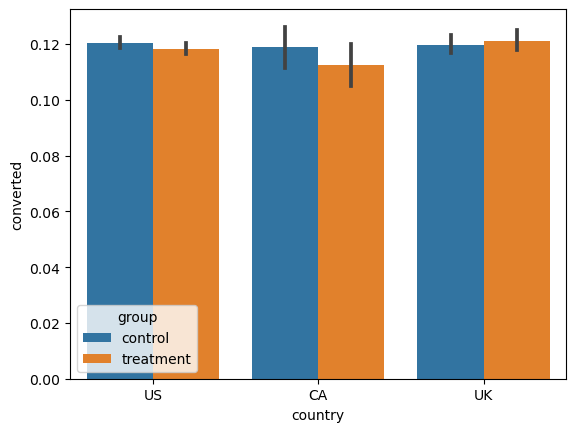

In [22]:
sns.barplot(x ='country', y = 'converted', hue = 'group', data = df3)


## Above we can see that there is no large difference between the conversion rate of the control and treatment groups in all locations. It also can be noted that the location with the largest difference (of 0.67%) also had the largest line of error. Below the graph shows the exact conversion rates

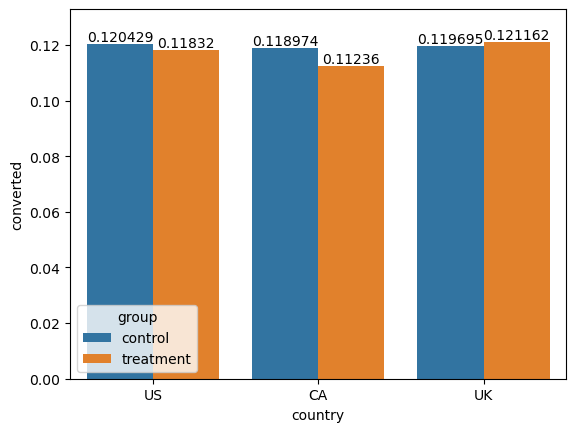

In [26]:
ax = sns.barplot(x ='country', y = 'converted', hue = 'group', data = df3, errwidth = 0)
for i in ax.containers:
    ax.bar_label(i,)

## It is clear that using the new landing page, provides no advantage to the company. It is recommended that the company make its decision knowing that the new and old landing page will provide the same conversion rate.